In [3]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Models and Utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC

# Imbalanced Learning
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler

# Other Machine Learning Libraries
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Miscellaneous
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [4]:
dataset = pd.read_csv('data.csv')
df = dataset.copy()

In [5]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [6]:
df.shape

(6819, 96)

In [11]:
df.columns = ["X"+str(x) for x in range (1,97)]

In [12]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81',
       'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91',
       'X92', 'X93', 'X94', 'X95', 'X96'],
      dtype='object')

In [10]:
#df.columns = [i.lower().strip().replace(' ','_') for i in df.columns]
#df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61',
       'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71',
       'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81',
       'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'x88', 'x89', 'x90', 'x91',
       'x92', 'x93', 'x94', 'x95', 'x96'],
      dtype='object')

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6819 non-null   int64  
 1   X2      6819 non-null   float64
 2   X3      6819 non-null   float64
 3   X4      6819 non-null   float64
 4   X5      6819 non-null   float64
 5   X6      6819 non-null   float64
 6   X7      6819 non-null   float64
 7   X8      6819 non-null   float64
 8   X9      6819 non-null   float64
 9   X10     6819 non-null   float64
 10  X11     6819 non-null   float64
 11  X12     6819 non-null   float64
 12  X13     6819 non-null   float64
 13  X14     6819 non-null   float64
 14  X15     6819 non-null   float64
 15  X16     6819 non-null   float64
 16  X17     6819 non-null   float64
 17  X18     6819 non-null   float64
 18  X19     6819 non-null   float64
 19  X20     6819 non-null   float64
 20  X21     6819 non-null   float64
 21  X22     6819 non-null   float64
 22  

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,6819.0,3.226280e-02,1.767102e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
X2,6819.0,5.051796e-01,6.068564e-02,0.0,4.765271e-01,5.027056e-01,5.355628e-01,1.000000e+00
X3,6819.0,5.586249e-01,6.562003e-02,0.0,5.355430e-01,5.598016e-01,5.891572e-01,1.000000e+00
X4,6819.0,5.535887e-01,6.159481e-02,0.0,5.272766e-01,5.522780e-01,5.841051e-01,1.000000e+00
X5,6819.0,6.079480e-01,1.693381e-02,0.0,6.004447e-01,6.059975e-01,6.139142e-01,1.000000e+00
X6,6819.0,6.079295e-01,1.691607e-02,0.0,6.004338e-01,6.059759e-01,6.138421e-01,1.000000e+00
X7,6819.0,9.987551e-01,1.301003e-02,0.0,9.989692e-01,9.990222e-01,9.990945e-01,1.000000e+00
X8,6819.0,7.971898e-01,1.286899e-02,0.0,7.973859e-01,7.974636e-01,7.975788e-01,1.000000e+00
X9,6819.0,8.090836e-01,1.360065e-02,0.0,8.093116e-01,8.093752e-01,8.094693e-01,1.000000e+00
X10,6819.0,3.036229e-01,1.116344e-02,0.0,3.034663e-01,3.035255e-01,3.035852e-01,1.000000e+00


In [17]:
df['X1'].value_counts()

0    6599
1     220
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='count'>

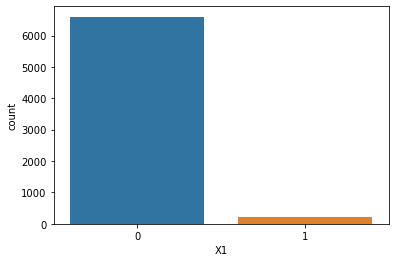

In [20]:
sns.countplot(x=df['X1'])

In [18]:
df['X86'].value_counts()

0    6811
1       8
Name: X86, dtype: int64

<AxesSubplot:xlabel='X86', ylabel='count'>

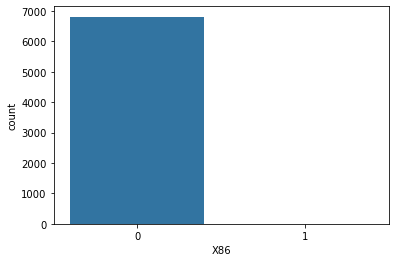

In [21]:
sns.countplot(x=df['X86'])

In [19]:
df['X95'].value_counts()

1    6819
Name: X95, dtype: int64

<AxesSubplot:xlabel='X95', ylabel='count'>

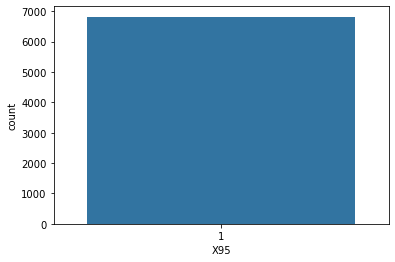

In [22]:
sns.countplot(x=df['X95'])

In [23]:
df.drop('X95', axis=1, inplace=True)

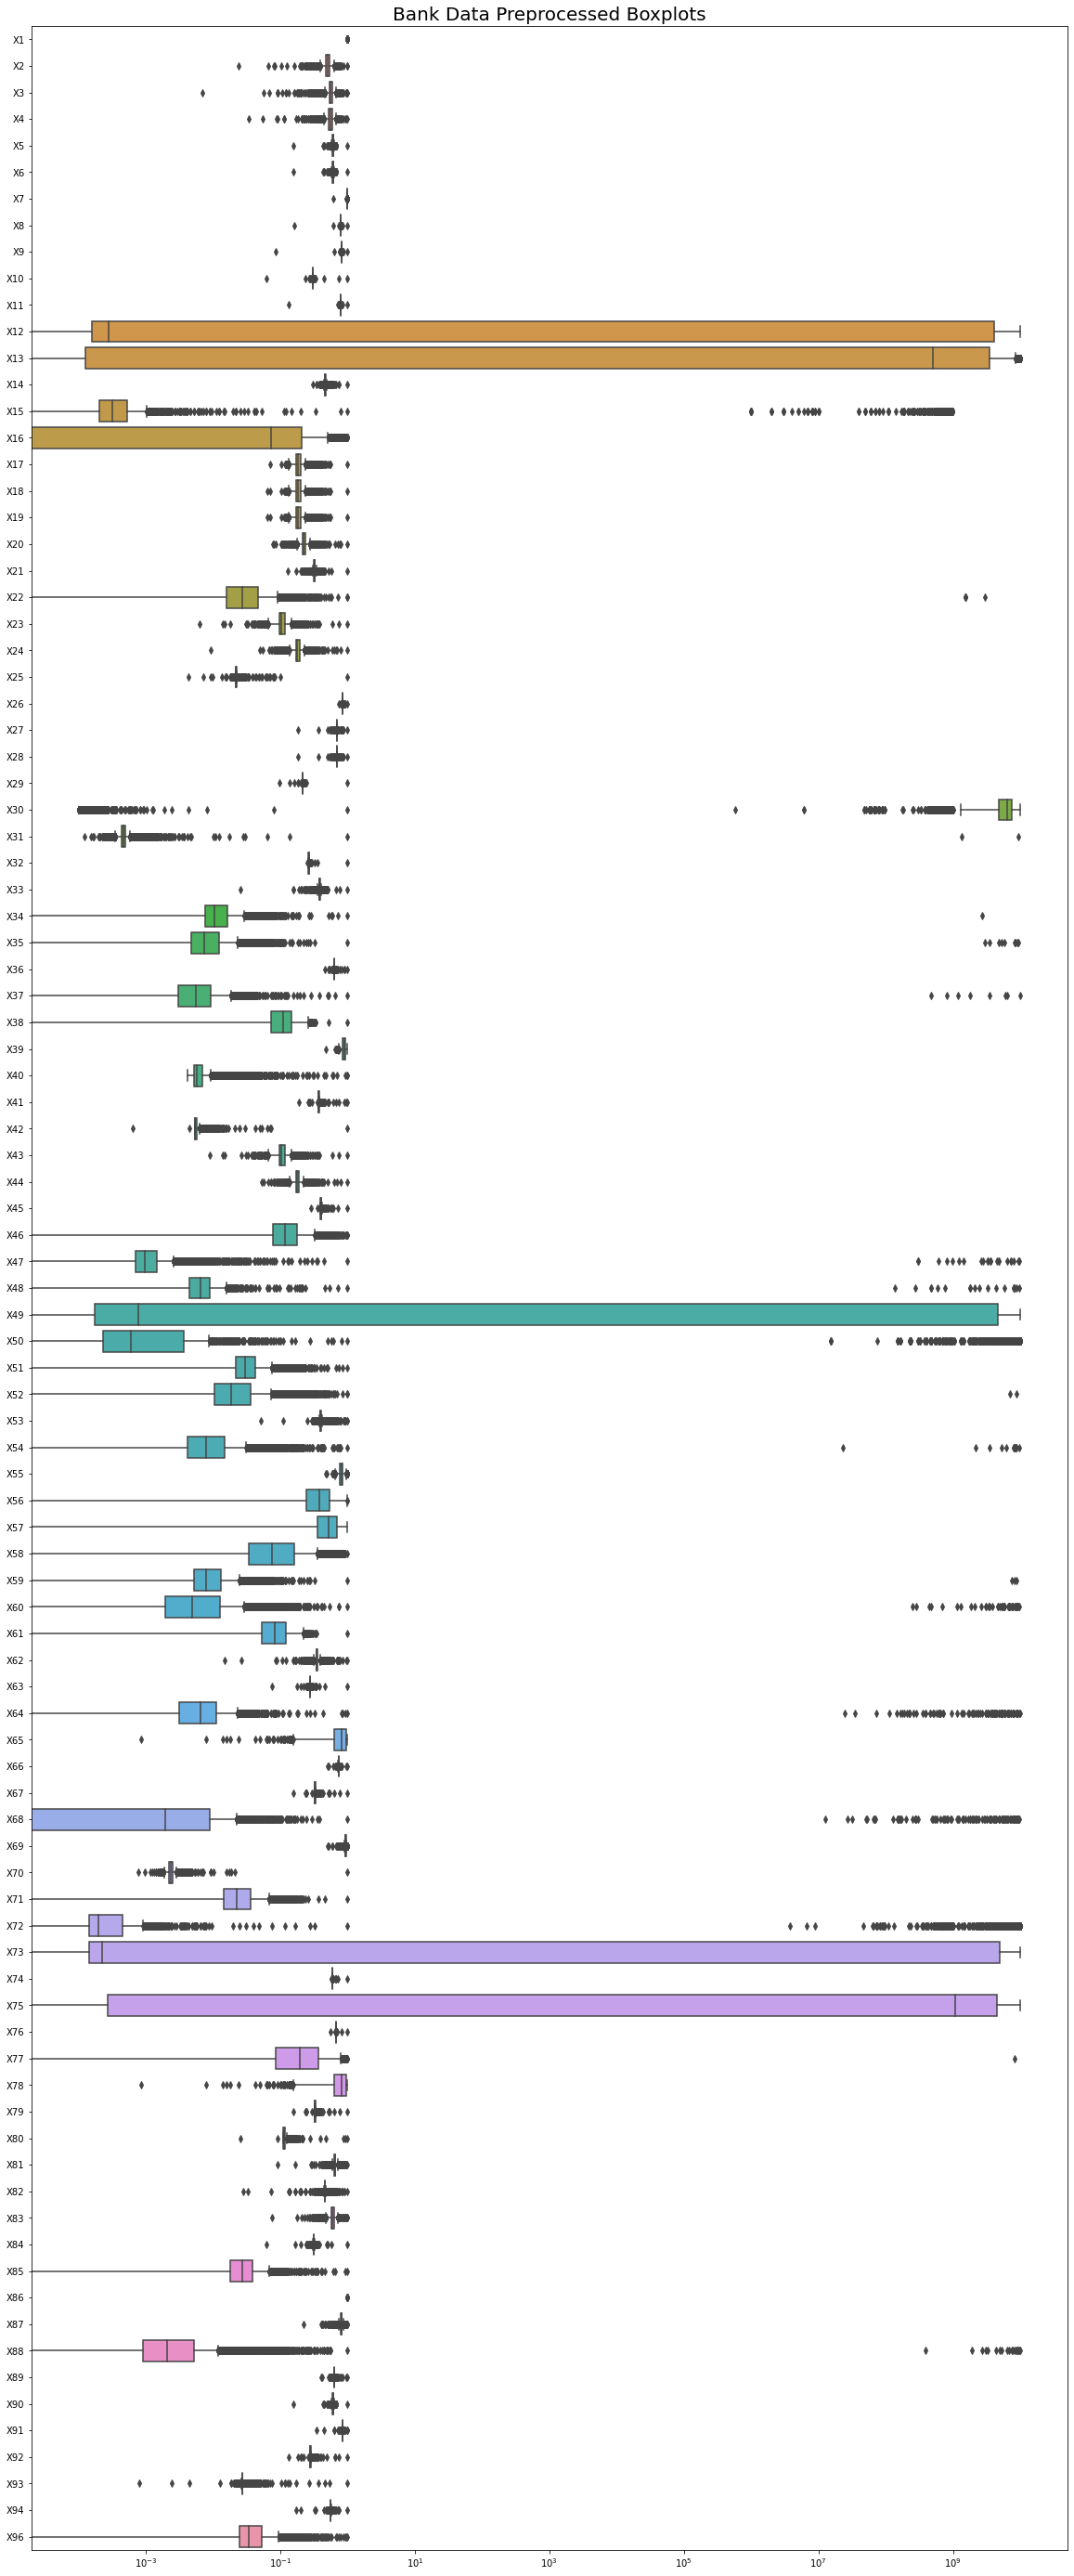

In [25]:
plt.figure(figsize = (20,50))
ax = sns.boxplot(data=df, orient="h")
ax.set_title('Bank Data Preprocessed Boxplots', fontsize=20)
ax.set(xscale='log')
plt.show()

In [35]:
X=df.iloc[:,1:]
y =df.iloc[:,[0]]
scaler= RobustScaler()
X.iloc[:,:] = scaler.fit_transform(X)
# X iloc-la verende numpya cevrimediyi uchun (scaler hissesinde numpy array olur) ona gore scalerin duzgun ishlemesi uchun onu dataframe shekilne salmaq lazimdir!

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=123, stratify=y)

# Bagging Classifier 

In [62]:
svm = SVC(probability=True)

bag= BaggingClassifier(base_estimator = svm, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



In [42]:
classifier = RandomForestClassifier()

bag= BaggingClassifier(base_estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)

In [43]:
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)

In [44]:
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.67      0.12      0.21        66

    accuracy                           0.97      2046
   macro avg       0.82      0.56      0.59      2046
weighted avg       0.96      0.97      0.96      2046



# UnderSampling

In [47]:
undersample = NearMiss(version=1, n_neighbors = 3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [48]:
y_train_us.value_counts()

X1
0     154
1     154
dtype: int64

# Bagging Classifier 

In [49]:
classifier = RandomForestClassifier()

bag= BaggingClassifier(base_estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train_us, y_train_us)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80      1980
           1       0.09      0.94      0.16        66

    accuracy                           0.68      2046
   macro avg       0.54      0.81      0.48      2046
weighted avg       0.97      0.68      0.78      2046



# Boosting Models

In [51]:
gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_train_us, y_train_us)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1980
           1       0.08      0.97      0.15        66

    accuracy                           0.64      2046
   macro avg       0.54      0.80      0.46      2046
weighted avg       0.97      0.64      0.75      2046



In [52]:
xgbt = XGBClassifier()
xgbt.fit(X_train_us, y_train_us)
xgbt_pred = xgbt.predict(X_test)
print(classification_report(y_test, xgbt_pred))

[15:16:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.63      0.77      1980
           1       0.08      0.97      0.15        66

    accuracy                           0.64      2046
   macro avg       0.54      0.80      0.46      2046
weighted avg       0.97      0.64      0.75      2046



In [61]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train_us, y_train_us)
cb_pred = cb.predict(X_test)
print(classification_report(y_test, cb_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81      1980
           1       0.09      0.92      0.16        66

    accuracy                           0.69      2046
   macro avg       0.54      0.81      0.49      2046
weighted avg       0.97      0.69      0.79      2046



In [54]:
lgb= LGBMClassifier()
lgb.fit(X_train_us, y_train_us)
lgb_pred = lgb.predict(X_test)
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79      1980
           1       0.08      0.97      0.15        66

    accuracy                           0.66      2046
   macro avg       0.54      0.81      0.47      2046
weighted avg       0.97      0.66      0.76      2046



# Oversampling 

In [58]:
ros = RandomOverSampler(random_state=123)

In [59]:
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [ ]:
y_train_os.value_counts()

X1
0     4619
1     4619
dtype: int64

In [63]:
svm = SVC(probability=True)

bag= BaggingClassifier(base_estimator = svm, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_train_os, y_train_os)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85      1980
           1       0.05      0.42      0.09        66

    accuracy                           0.74      2046
   macro avg       0.51      0.59      0.47      2046
weighted avg       0.95      0.74      0.82      2046



In [64]:
gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_train_os, y_train_os)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1980
           1       0.27      0.68      0.39        66

    accuracy                           0.93      2046
   macro avg       0.63      0.81      0.68      2046
weighted avg       0.97      0.93      0.95      2046



In [65]:
xgbt = XGBClassifier()
xgbt.fit(X_train_os, y_train_os)
xgbt_pred = xgbt.predict(X_test)
print(classification_report(y_test, xgbt_pred))

[15:43:12] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.51      0.36      0.42        66

    accuracy                           0.97      2046
   macro avg       0.74      0.68      0.70      2046
weighted avg       0.96      0.97      0.97      2046



In [68]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_train_os, y_train_os)
cb_pred = cb.predict(X_test)
print(classification_report(y_test, cb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.46      0.35      0.40        66

    accuracy                           0.97      2046
   macro avg       0.72      0.67      0.69      2046
weighted avg       0.96      0.97      0.96      2046



In [69]:
lgb= LGBMClassifier()
lgb.fit(X_train_os, y_train_os)
lgb_pred = lgb.predict(X_test)
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.55      0.39      0.46        66

    accuracy                           0.97      2046
   macro avg       0.77      0.69      0.72      2046
weighted avg       0.97      0.97      0.97      2046



# Use both oversamping and undersampling same time 

In [73]:
df_1 = pd.concat([X_train, y_train], axis=1)

train_0 = df_1[df_1['X1']==0]
train_1 = df_1[df_1['X1']==1]
X = train_0.drop('X1', axis=1)
y = train_0[['X1']]

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(X, y, test_size=0.5, random_state=123, stratify=y)

new_train_0 = pd.concat([new_X_train, new_y_train], axis=1)
new_train_0_part2=pd.concat([new_X_test, new_y_test], axis=1)

df_2 = pd.concat([train_1, new_train_0], axis=0)
x1 = df_2.drop('X1' , axis=1)
y1 = df_2[['X1']]

ros = RandomOverSampler (random_state=0)
x1_os, y1_os = ros.fit_resample(x1,y1)
new_data = pd.concat([pd.concat([x1_os, y1_os], axis=1), new_train_0_part2], axis=0)

X= new_data.drop('X1', axis=1)
y= new_data[['X1']]

undersample = NearMiss(version=1, n_neighbors=3)
X_rs, y_rs = undersample.fit_resample(X,y)

y_rs.value_counts()

X1
0     2309
1     2309
dtype: int64

In [74]:
classifier = RandomForestClassifier()

bag= BaggingClassifier(base_estimator = classifier, n_estimators = 10, max_samples = 0.4, max_features = 35, bootstrap=True, bootstrap_features = True, n_jobs = -1, random_state=123)
bag.fit(X_rs, y_rs)
bag_pred = bag.predict(X_test)
print(classification_report(y_test, bag_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1980
           1       0.24      0.76      0.36        66

    accuracy                           0.91      2046
   macro avg       0.61      0.84      0.66      2046
weighted avg       0.97      0.91      0.93      2046



# Boosting Models

In [75]:
gbc = GradientBoostingClassifier(random_state = 123)
gbc.fit(X_rs, y_rs)
gbc_pred = gbc.predict(X_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94      1980
           1       0.20      0.79      0.32        66

    accuracy                           0.89      2046
   macro avg       0.60      0.84      0.63      2046
weighted avg       0.97      0.89      0.92      2046



In [76]:
xgbt = XGBClassifier()
xgbt.fit(X_rs, y_rs)
xgbt_pred = xgbt.predict(X_test)
print(classification_report(y_test, xgbt_pred))

[16:09:30] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1980
           1       0.27      0.70      0.39        66

    accuracy                           0.93      2046
   macro avg       0.63      0.82      0.68      2046
weighted avg       0.97      0.93      0.94      2046



In [77]:
cb = CatBoostClassifier(verbose=0)
cb.fit(X_rs, y_rs)
cb_pred = cb.predict(X_test)
print(classification_report(y_test, cb_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1980
           1       0.25      0.64      0.36        66

    accuracy                           0.93      2046
   macro avg       0.62      0.79      0.66      2046
weighted avg       0.96      0.93      0.94      2046



In [78]:
lgb= LGBMClassifier()
lgb.fit(X_rs, y_rs)
lgb_pred = lgb.predict(X_test)
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1980
           1       0.28      0.65      0.40        66

    accuracy                           0.94      2046
   macro avg       0.64      0.80      0.68      2046
weighted avg       0.97      0.94      0.95      2046

